In [1]:
import apss_lib
import numpy as np
%matplotlib inline
apss_lib.verbose = False

2020-09-28 13:41:18.385878


In [2]:
import ppplot
import matplotlib.pyplot as mpl
ppplot.changefont(20)
ppplot.changemarkersize(7)

In [3]:
solini = 0 ; solsol = 400 ; ttinter = [[11,15]]
ttinter = [[12,13]]
ttinter = [[12,14]]
ttinter = [[11,13]]
ttinter = [[10,15]]
ttinter = [[11,14]]

In [4]:
pre = np.load("pre.npy")
prex = np.load("prex.npy")
pat = np.load("pat.npy")
patx = np.load("patx.npy")
mat = np.load("mat.npy")
matx = np.load("matx.npy")
hws = np.load("hws.npy")
hwsx = np.load("hwsx.npy")
hwsstd = np.load("hwsstd.npy")
hwsstdx = np.load("hwsstdx.npy")
hwd = np.load("hwd.npy")
hwdx = np.load("hwdx.npy")

In [5]:
temp = 0.5*(mat+pat)
temp = np.minimum(mat,pat)
temp2 = np.maximum(mat,pat)

In [6]:
datext = "tsurf_bins_LT_%i_%i.txt"%(ttinter[0][0],ttinter[0][1])
solts,tsurfts = np.loadtxt(datext,unpack=True)

foo,sols  = np.modf(solts)
foo,sola  = np.modf(patx)
foo,solw  = np.modf(hwsx)
foo,solp  = np.modf(prex)
dasol     = np.array([])
dapre     = np.array([])
dat_s     = np.array([])
dat_a     = np.array([])
dat_p     = np.array([])
dat_m     = np.array([])
datsa     = np.array([])
datsam    = np.array([])
datsap    = np.array([])
datsay    = np.array([])
datsax    = np.array([])
dahws     = np.array([])
dahwd     = np.array([])
dahwsstd  = np.array([])
dahwsstdn = np.array([])
daflux    = np.array([])
for sol in sols:
    press = pre[solp == sol]    
    tatm  = temp[sola == sol]
    tatmm = mat[sola == sol]
    tatmp = pat[sola == sol]
    tatmy = 0.5*(tatmm+tatmp)
    tatmx = temp2[sola == sol]
    tsur  = tsurfts[sols == sol]
    ws    = hws[solw == sol]
    wsstd = hwsstd[solw == sol]
    wd    = hwd[solw == sol]
    if len(tatm) > 0 and len(ws) > 0:
        dasol     = np.append(dasol,sol)
        dapre     = np.append(dapre,press)
        dat_s     = np.append(dat_s,tsur)
        dat_a     = np.append(dat_a,tatm)
        dat_p     = np.append(dat_p,tatmp)
        dat_m     = np.append(dat_m,tatmm)
        datsa     = np.append(datsa,tsur-tatm)
        datsam    = np.append(datsam,tsur-tatmm)
        datsap    = np.append(datsap,tsur-tatmp)
        datsay    = np.append(datsay,tsur-tatmy)
        datsax    = np.append(datsax,tsur-tatmx)
        dahws     = np.append(dahws,ws)
        dahwd     = np.append(dahwd,wd)
        dahwsstd  = np.append(dahwsstd,wsstd)
        dahwsstdn = np.append(dahwsstdn,wsstd/ws)
        daflux    = np.append(daflux,4.4*(press/tatm)*ws*0.08*(tsur-tatm)*0.08)

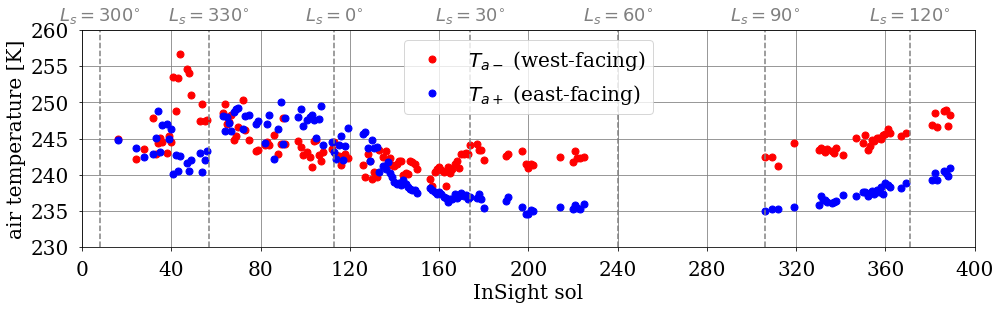

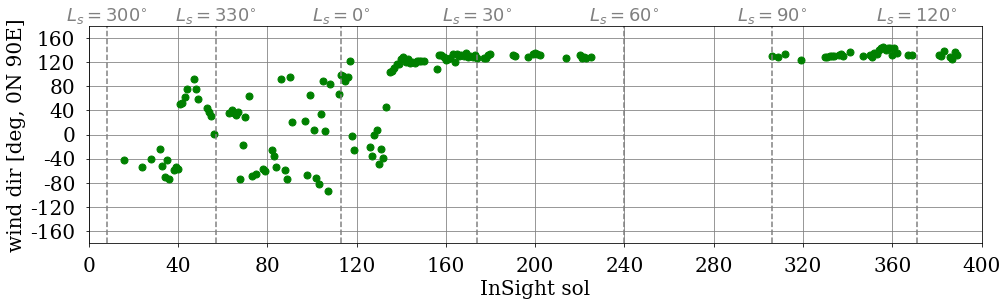

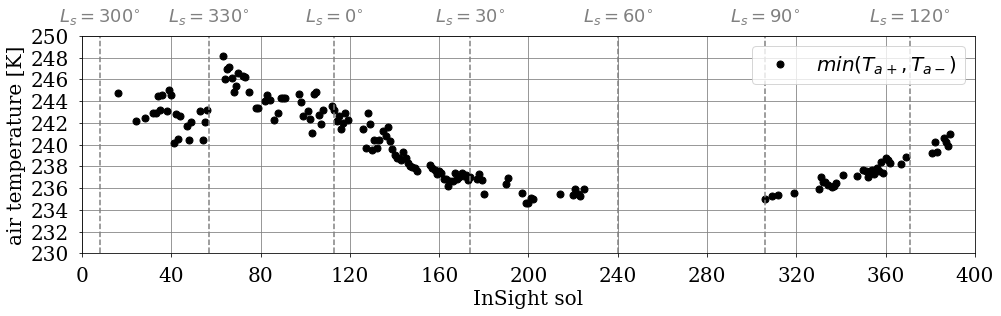

In [7]:
fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "air temperature [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 230
pl.ymax = 260
pl.nyticks = 6 #12
pl.f, pl.x = dat_m, dasol ; pl.color = "r" ; pl.legend = "$T_{a-}$ (west-facing)" ; pl.make()
pl.f, pl.x = dat_p, dasol ; pl.color = "b" ; pl.legend = "$T_{a+}$ (east-facing)" ; pl.make()
#pl.f, pl.x = mat, matx ; pl.color = "r" ; pl.legend = "$T_{a-}$ (west-facing)" ; pl.make()
#pl.f, pl.x = pat, patx ; pl.color = "b" ; pl.legend = "$T_{a+}$ (east-facing)" ; pl.make()
apss_lib.axisls(pl,addlspos=1.007,col="grey")
ppplot.save(mode="pdf",filename="paper_TATM")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.color = "m"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "wind dir [deg, 0N 90E]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = -180
pl.ymax = +180
pl.nyticks = 9
pl.f, pl.x = dahwd,dasol ; pl.color = "g" ; pl.make()
#pl.f, pl.x = hwd,hwdx
apss_lib.axisls(pl,addlspos=1.08,col="grey")
ppplot.save(mode="pdf",filename="paper_HWD")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "air temperature [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 230
pl.ymax = 250
pl.nyticks = 10
pl.f, pl.x = dat_a, dasol ; pl.color = "k" ; pl.legend = "$min(T_{a+},T_{a-})$" ; pl.make()
#pl.f, pl.x = temp, matx
apss_lib.axisls(pl,addlspos=1.007,col="grey")
ppplot.save(mode="pdf",filename="paper_TATMmin")

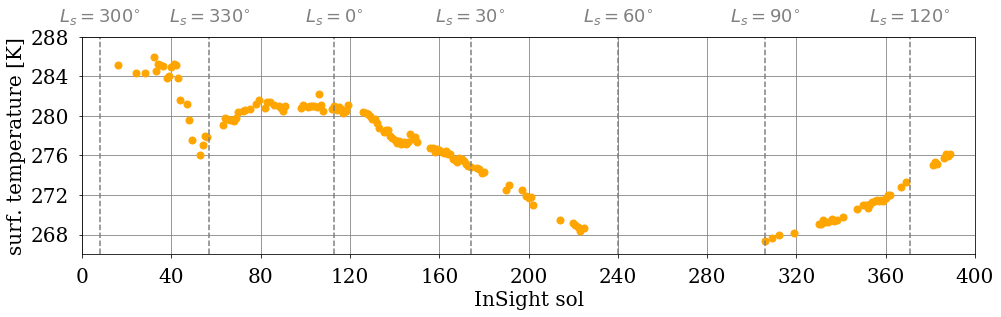

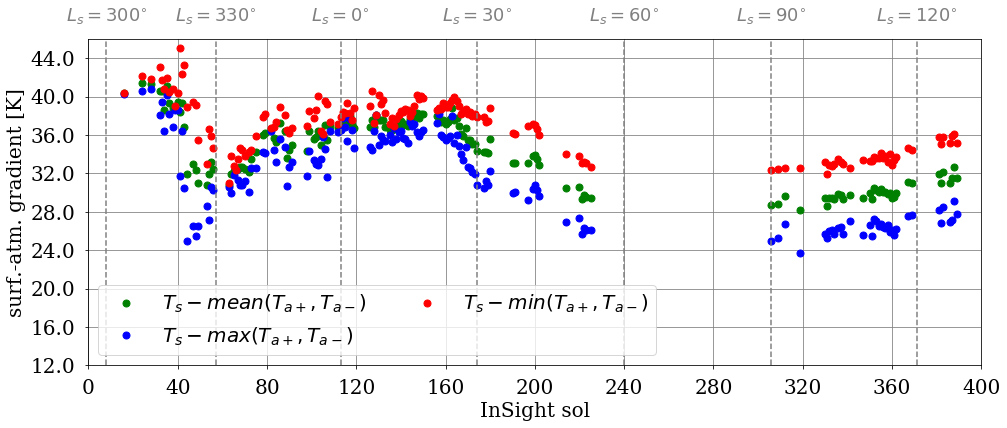

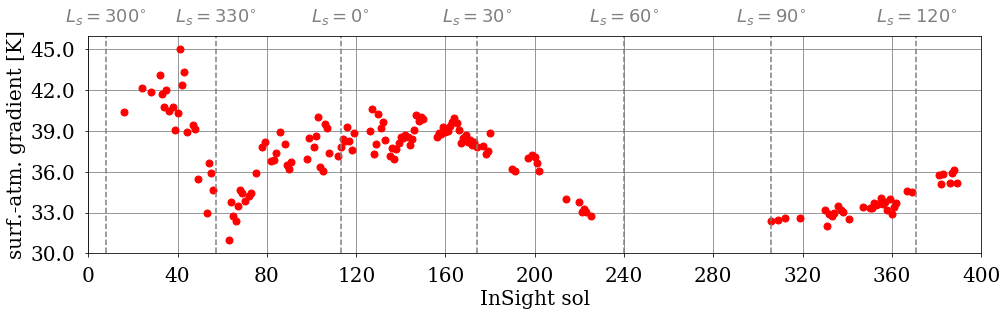

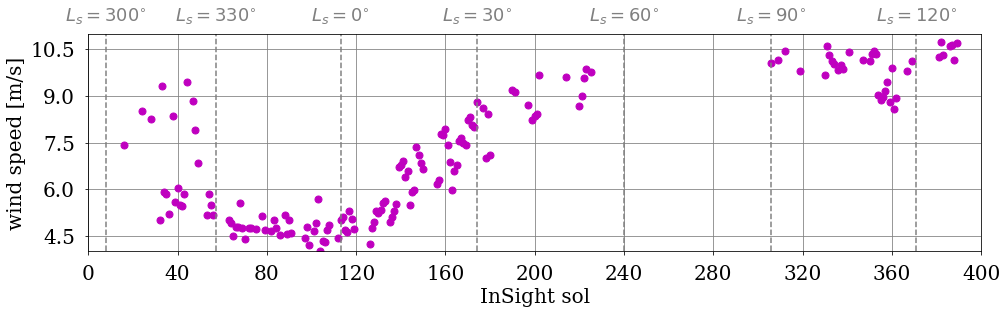

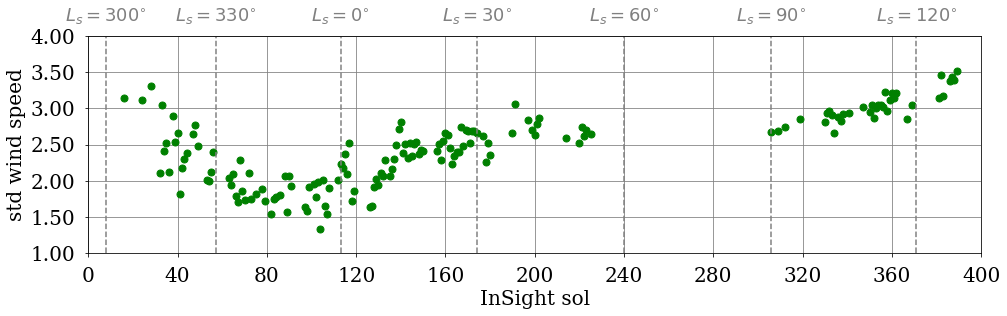

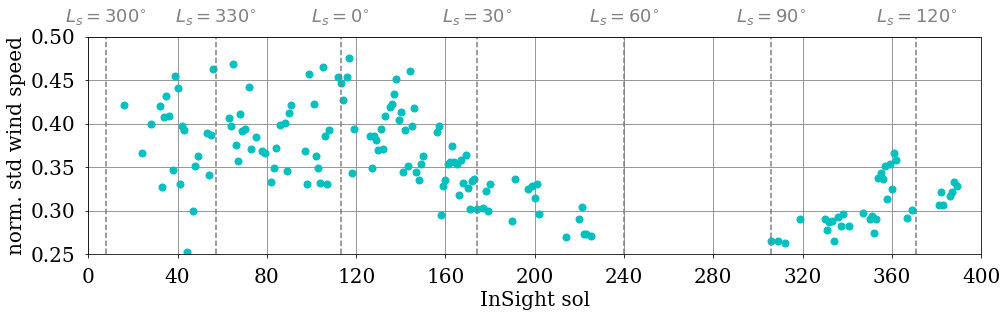

In [8]:
fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = dat_s, dasol
pl.color = "orange"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "surf. temperature [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 266 #266
pl.ymax = 288 #286
pl.nyticks = 6 #12
pl.make()
apss_lib.axisls(pl,addlspos=1.007,col="grey")
ppplot.save(mode="pdf",filename="paper_TSURF")

fig = ppplot.figuref(x=16,y=6)
pl = ppplot.plot1d(fig=fig)
pl.fmt = "%.1f"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "surf.-atm. gradient [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 12
pl.ymax = 46
#pl.f, pl.x = datsam, dasol ; pl.color = "g" ; pl.legend = "$T_{s} - T_{a-}$" ; pl.make()
#pl.f, pl.x = datsap, dasol ; pl.color = "b" ; pl.legend = "$T_{s} - T_{a+}$" ; pl.make()
pl.f, pl.x = datsay, dasol ; pl.color = "g" ; pl.legend = "$T_{s} - mean(T_{a+},T_{a-})$" ; pl.make()
pl.f, pl.x = datsax, dasol ; pl.color = "b" ; pl.legend = "$T_{s} - max(T_{a+},T_{a-})$"  ; pl.make()
pl.f, pl.x = datsa, dasol  ; pl.color = "r" ; pl.legend = "$T_{s} - min(T_{a+},T_{a-})$"  ; pl.make()
pl.ax.legend(loc="lower left", ncol=2)
apss_lib.axisls(pl,addlspos=1.05,col="grey")
ppplot.save(mode="pdf",filename="paper_SAG_detailed")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.fmt = "%.1f"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "surf.-atm. gradient [K]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 30 #26
pl.ymax = 46 #40
pl.nyticks = 6 #13
pl.f, pl.x = datsa, dasol
pl.color = "r"
pl.make()
apss_lib.axisls(pl,addlspos=1.03,col="grey")
ppplot.save(mode="pdf",filename="paper_SAG")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.fmt = "%.1f"
pl.f, pl.x = dahws, dasol
pl.color = "m"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "wind speed [m/s]"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 4
pl.ymax = 11
pl.nyticks = 6
pl.make()
apss_lib.axisls(pl,addlspos=1.05,col="grey")
ppplot.save(mode="pdf",filename="paper_HWS")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = dahwsstd, dasol
pl.fmt = "%.2f"
pl.color = "g"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "std wind speed"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 1
pl.ymax = 4
pl.nyticks = 6
pl.make()  
apss_lib.axisls(pl,addlspos=1.065,col="grey")
ppplot.save(mode="pdf",filename="paper_STW")

fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
pl.f, pl.x = dahwsstdn, dasol
pl.fmt = "%.2f"
pl.color = "c"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = "norm. std wind speed"
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 0.25
pl.ymax = 0.50
pl.nyticks = 6
pl.make()  
apss_lib.axisls(pl,addlspos=1.045,col="grey")
ppplot.save(mode="pdf",filename="paper_STWN")

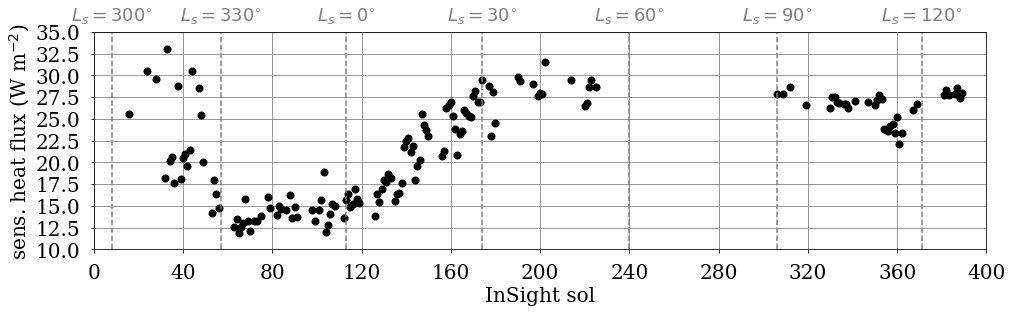

In [9]:
fig = ppplot.figuref(x=16,y=4)
pl = ppplot.plot1d(fig=fig)
w = np.isfinite(daflux)
pl.f, pl.x = daflux[w], dasol[w]
pl.color = "k"
pl.linestyle = "" 
pl.marker = "o"
pl.ylabel = r'sens. heat flux (W m$^{-2}$)' #[kg m$^{-3}$ K m/s]
pl.xlabel = "InSight sol"
pl.xmin = solini
pl.xmax = solini+solsol
pl.ymin = 10
pl.ymax = 35
pl.nyticks = 12
pl.fmt = '%.1f'
pl.make()  
apss_lib.axisls(pl,addlspos=1.05,col="grey")
ppplot.save(mode="pdf",filename="paper_SHF")

In [10]:
fifi = "/home/aspiga/soft/insight-PBL-JGRplanets/WORKFLOW_drops/outputjgr_W1000_LIM0p35_B30_DENOISE/txt_sol_to_sol/solDD_above_0p3.txt"
ddsol,foo,ddn,foo = np.loadtxt(fifi,unpack=True,skiprows=1)


count = 0
gg = np.array([])
dd = np.array([])
tt = np.array([])
ww = np.array([])
nn = np.array([])
ta = np.array([])
tp = np.array([])
tm = np.array([])
fx = np.array([])
for sol in ddsol:
    w = np.where(dasol == sol)
    if len(w[0]) > 0:
        gg = np.append(gg,dahwsstdn[w])
        dd = np.append(dd,datsa[w])
        tt = np.append(tt,dat_s[w])
        ww = np.append(ww,dahws[w])
        nn = np.append(nn,ddn[count])
        ta = np.append(ta,dat_a[w])
        tp = np.append(tp,dat_p[w])
        tm = np.append(tm,dat_m[w])
        fx = np.append(fx,daflux[w])
    count = count+1

In [11]:
import scipy.stats

w = np.isfinite(tt)
tt = tt[w] ; nn = nn[w] ; gg = gg[w] ; ww = ww[w] ; dd = dd[w] ; ta = ta[w] ; tp = tp[w] ; tm = tm[w] ; fx = fx[w]

pc_tt_nn = scipy.stats.pearsonr(tt,nn)[0]
pc_ww_nn = scipy.stats.pearsonr(ww,nn)[0]
pc_dd_nn = scipy.stats.pearsonr(dd,nn)[0]
pc_fx_nn = scipy.stats.pearsonr(fx,nn)[0]
pc_tt_gg = scipy.stats.pearsonr(tt,gg)[0]
pc_fx_gg = scipy.stats.pearsonr(fx,gg)[0]
pc_ww_ta = scipy.stats.pearsonr(ww,ta)[0]
pc_ww_tt = scipy.stats.pearsonr(ww,tt)[0]
pc_ww_dd = scipy.stats.pearsonr(ww,dd)[0]
pc_tt_ta = scipy.stats.pearsonr(tt,ta)[0]
pc_tt_tm = scipy.stats.pearsonr(tt,tm)[0]
pc_tt_tp = scipy.stats.pearsonr(tt,tp)[0]

print pc_tt_nn,scipy.stats.spearmanr(tt,nn)[0],scipy.stats.kendalltau(tt,nn)[0]
print pc_ww_nn,scipy.stats.spearmanr(ww,nn)[0],scipy.stats.kendalltau(ww,nn)[0]
print pc_dd_nn,scipy.stats.spearmanr(dd,nn)[0],scipy.stats.kendalltau(dd,nn)[0]
print pc_tt_gg,scipy.stats.spearmanr(tt,gg)[0],scipy.stats.kendalltau(tt,gg)[0]

-0.5958830272319724 -0.6414736589889282 -0.4607702824218007
0.8672466347649922 0.8603897655153614 0.6638385065102391
-0.32927455467003275 -0.3154735052325038 -0.20547976319513978
0.6969644631990828 0.703300690279647 0.5262126408623223


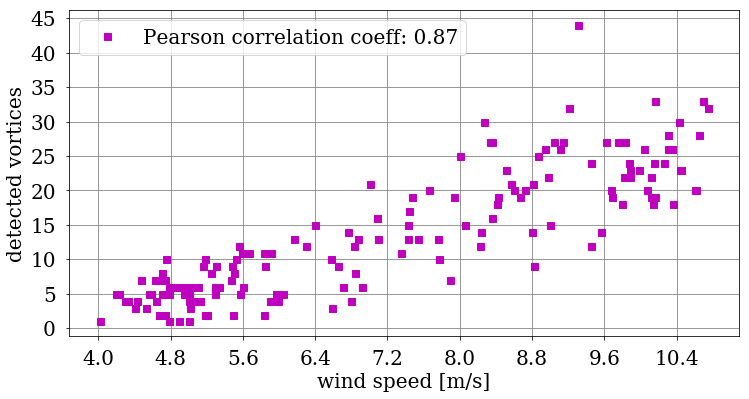

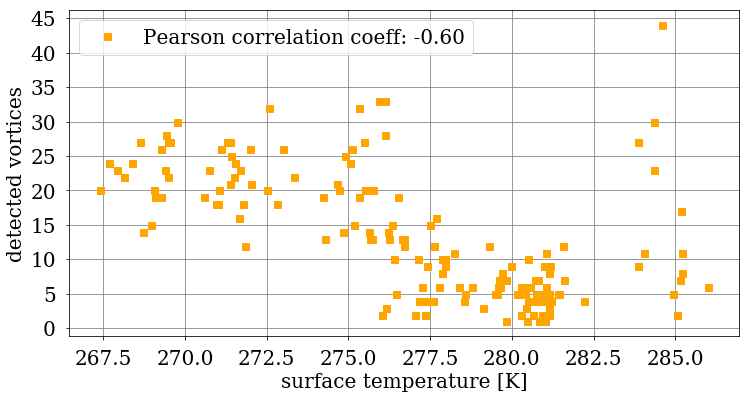

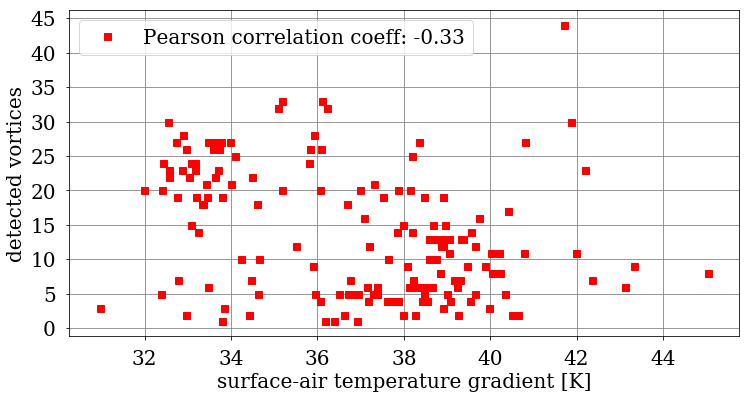

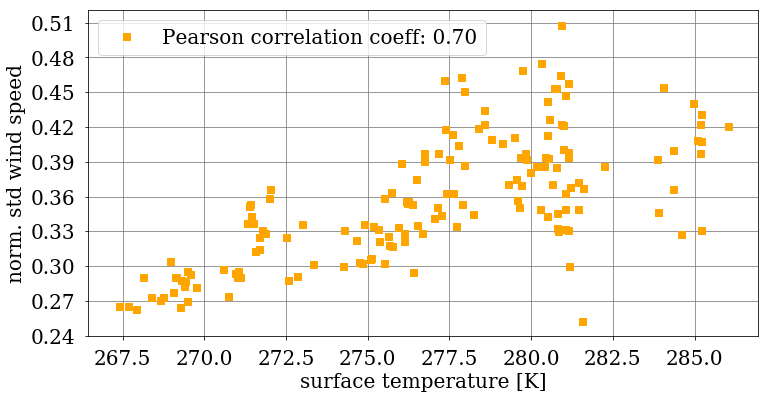

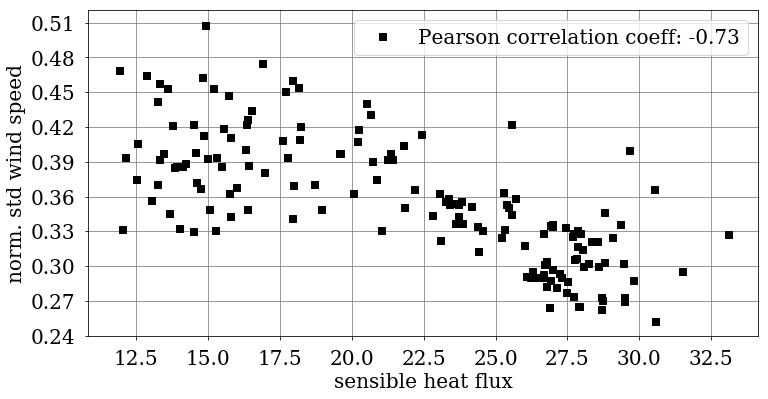

In [12]:
import ppplot

fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = nn ; pl.x = ww
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "m" 
pl.xlabel = "wind speed [m/s]"
pl.ylabel = "detected vortices"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_ww_nn)
pl.make()
ppplot.save(mode="pdf",filename="corr_ws_vortex")

fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = nn ; pl.x = tt
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "orange" 
pl.xlabel = "surface temperature [K]"
pl.ylabel = "detected vortices"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_tt_nn)
pl.make()
ppplot.save(mode="pdf",filename="corr_ts_vortex")

fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = nn ; pl.x = dd
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "r"
pl.xlabel = "surface-air temperature gradient [K]"
pl.ylabel = "detected vortices"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_dd_nn)
pl.make()
ppplot.save(mode="pdf",filename="corr_dts_vortex")


fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = gg ; pl.x = tt ; pl.fmt = "%.2f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "orange"
pl.xlabel = "surface temperature [K]"
pl.ylabel = "norm. std wind speed"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_tt_gg)
pl.make()
ppplot.save(mode="pdf",filename="corr_ws_gusti")

fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = gg ; pl.x = fx ; pl.fmt = "%.2f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "k"
pl.xlabel = "sensible heat flux"
pl.ylabel = "norm. std wind speed"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_fx_gg)
pl.make()
ppplot.save(mode="pdf",filename="corr_fx_gusti")

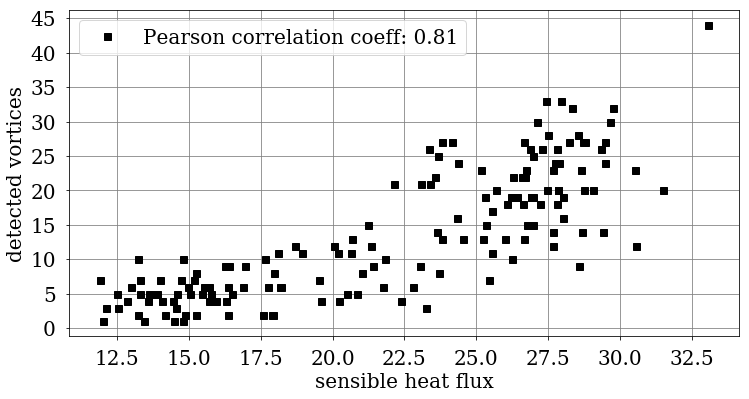

In [15]:
fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = nn ; pl.x = fx
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "k" 
pl.xlabel = "sensible heat flux"
pl.ylabel = "detected vortices"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_fx_nn)
pl.make()
ppplot.save(mode="pdf",filename="corr_fx_vortex")

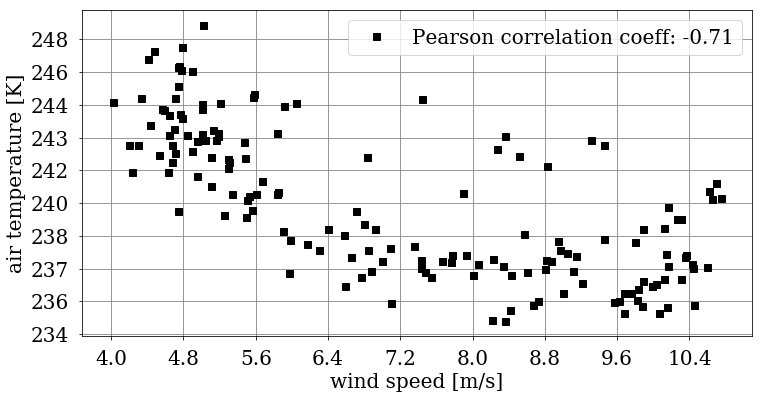

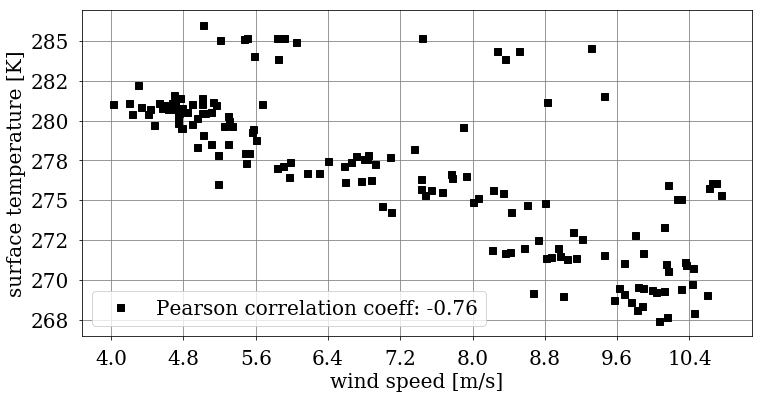

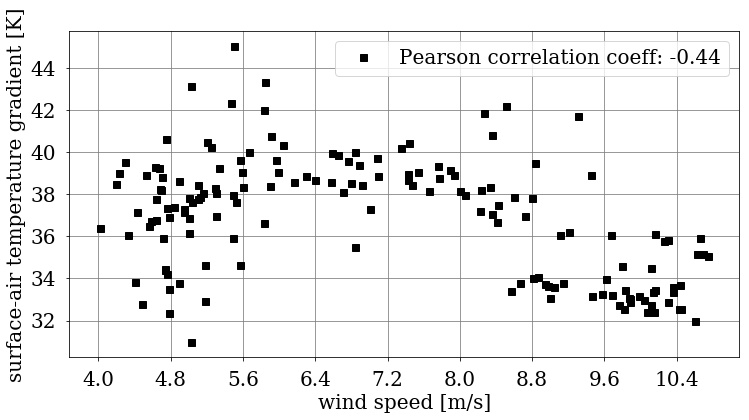

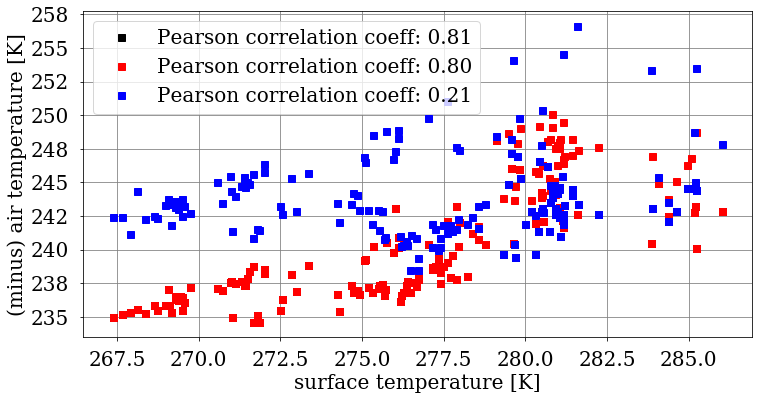

In [14]:
fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = ta ; pl.x = ww ; pl.fmt = "%.0f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "k"
pl.ylabel = "air temperature [K]"
pl.xlabel = "wind speed [m/s]"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_ww_ta)
pl.make()
fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = tt ; pl.x = ww ; pl.fmt = "%.0f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "k"
pl.ylabel = "surface temperature [K]"
pl.xlabel = "wind speed [m/s]"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_ww_tt)
pl.make()
fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = dd ; pl.x = ww ; pl.fmt = "%.0f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "k"
pl.ylabel = "surface-air temperature gradient [K]"
pl.xlabel = "wind speed [m/s]"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_ww_dd)
pl.make()
fig = ppplot.figuref(x=12,y=6)
pl = ppplot.plot1d(fig=fig)
pl.f = ta ; pl.x = tt ; pl.fmt = "%.0f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "k"
pl.ylabel = "air temperature [K]"
pl.xlabel = "surface temperature [K]"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_tt_ta)
pl.make()
#fig = ppplot.figuref(x=12,y=6)
#pl = ppplot.plot1d(fig=fig)
pl.f = tp ; pl.x = tt ; pl.fmt = "%.0f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "r"
pl.ylabel = "(plus) air temperature [K]"
pl.xlabel = "surface temperature [K]"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_tt_tp)
pl.make()
#fig = ppplot.figuref(x=12,y=6)
#pl = ppplot.plot1d(fig=fig)
pl.f = tm ; pl.x = tt ; pl.fmt = "%.0f"
pl.marker = "s" ; pl.linestyle = "" ; pl.color = "b"
pl.ylabel = "(minus) air temperature [K]"
pl.xlabel = "surface temperature [K]"
pl.legend = "Pearson correlation coeff: %.2f" % (pc_tt_tm)
pl.make()